<a href="https://colab.research.google.com/github/bastiansosa/procesamiento-digital/blob/main/procesamientodigital7(histogramas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

In [ ]:
img = np.round(io.imread('http://mrl.cs.vsb.cz/people/gaura/dzo/uneq.jpg', as_gray=True) *255)

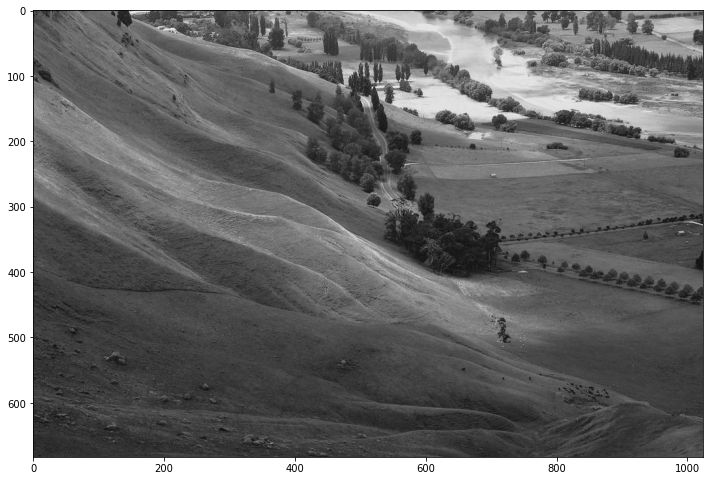

In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(img,cmap='gray')

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

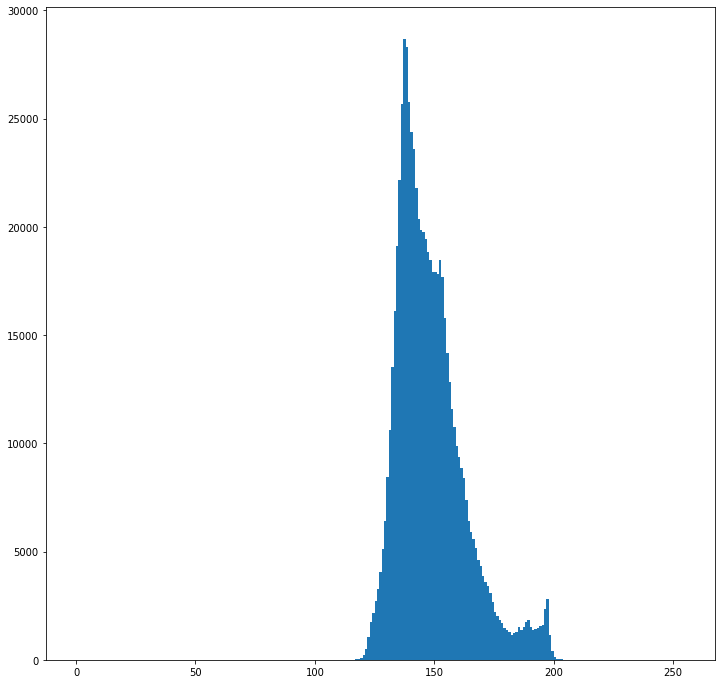

In [ ]:
plt.figure(figsize=(12,12))
plt.hist(img.ravel(), bins=range(0,256))

In [ ]:
nk, k = np.histogram(img.ravel(),bins=range(0,256))
M = img.shape[0]
N = img.shape[1]
pk = nk/(M*N)
Ti = pk.cumsum()

kl = np.round(Ti*255)

In [ ]:
#equalizacion
img_eq = img.copy()
for i in k:
  if i == k[-1]:
    break
  img_eq[img==i] = kl[i]


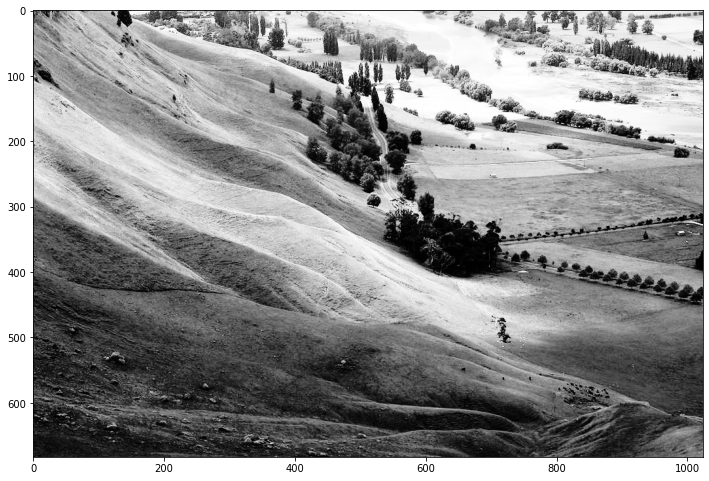

In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(img_eq,cmap='gray')

(array([  883.,  2808.,  2160.,  2718.,  3259.,     0.,  4039.,     0.,
         5108.,     0.,  6395.,     0.,     0.,  8463.,     0.,     0.,
            0., 10610.,     0.,     0.,     0.,     0., 13530.,     0.,
            0.,     0.,     0.,     0., 16115.,     0.,     0.,     0.,
            0.,     0.,     0., 19125.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 22186.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0., 25696.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0., 28701.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 28324.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0., 25759.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 24369.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0., 23578.,     0.,     0.,     0.,
            0.,     0.,     0.,     0., 21775.,     0.,     0., 

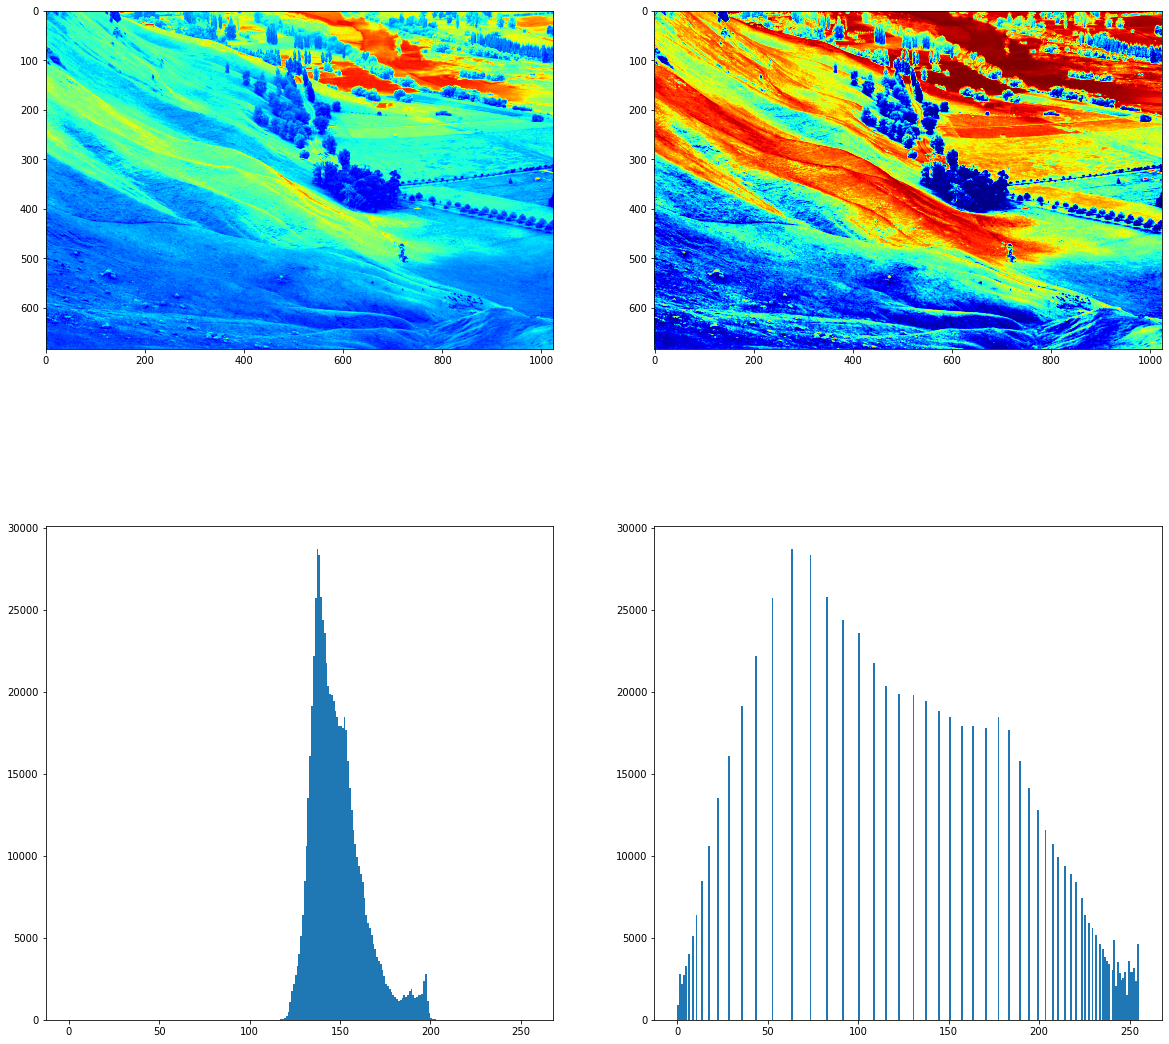

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(20,20))
axs[0,0].imshow(img,cmap='jet')
axs[0,1].imshow(img_eq,cmap='jet')
axs[1,0].hist(img.ravel(), bins=range(0,256))
axs[1,1].hist(img_eq.ravel(), bins=range(0,256))

(array([  883.,  2808.,  2160.,  2718.,  3259.,     0.,  4039.,     0.,
         5108.,     0.,  6395.,     0.,     0.,  8463.,     0.,     0.,
            0., 10610.,     0.,     0.,     0.,     0., 13530.,     0.,
            0.,     0.,     0.,     0., 16115.,     0.,     0.,     0.,
            0.,     0.,     0., 19125.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 22186.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0., 25696.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0., 28701.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 28324.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0., 25759.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 24369.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0., 23578.,     0.,     0.,     0.,
            0.,     0.,     0.,     0., 21775.,     0.,     0., 

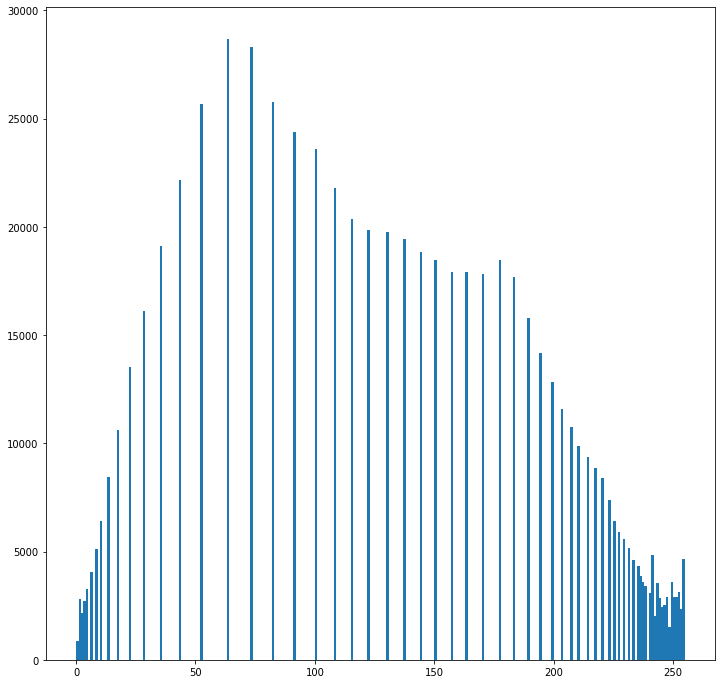

In [ ]:
plt.figure(figsize=(12,12))
plt.hist(img_eq.ravel(), bins=range(0,256))

## Convolucion

In [ ]:
Gx = np.array([[1,0,-1],
               [2,0,-2],
               [1,0,-1]])

Gy = Gx.T

H = Gy

imgconvx = np.zeros((img.shape[0]-H.shape[0]+1, img.shape[1]-H.shape[1]+1))

for i in range(0,img.shape[0]-H.shape[0]+1):
  for j in range(0,img.shape[1]-H.shape[1]+1):
    imgconvx[i,j] = np.sum(img_eq[i:i+H.shape[0],j:j+H.shape[1]] * H)

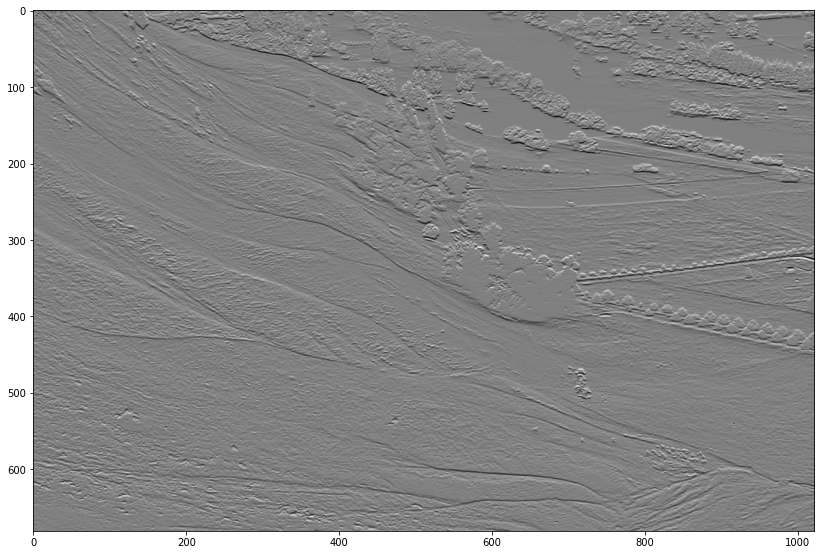

In [ ]:
plt.figure(figsize=(14,14))
plt.imshow(imgconvx,cmap='gray')

In [ ]:
img2 = np.round((imgconvx - imgconvx.min())/(imgconvx.max()-imgconvx.min()) *255)
img2 = (imgconvx - imgconvx.min())/(imgconvx.max()-imgconvx.min())

In [ ]:
img2

array([[0.41653983, 0.59056317, 0.65905632, ..., 0.59766616, 0.57940132,
        0.59005581],
       [0.59563673, 0.48249619, 0.42465753, ..., 0.72349061, 0.7564688 ,
        0.82496195],
       [0.6768138 , 0.5246068 , 0.40994419, ..., 0.66818874, 0.69152714,
        0.69457128],
       ...,
       [0.50634196, 0.50228311, 0.48655505, ..., 0.46981228, 0.47742263,
        0.50025368],
       [0.55403349, 0.54895992, 0.51090817, ..., 0.48909183, 0.51090817,
        0.52917301],
       [0.53424658, 0.536276  , 0.50989346, ..., 0.50380518, 0.50025368,
        0.50025368]])

In [ ]:
img

array([[127., 145., 149., ..., 168., 167., 166.],
       [165., 152., 143., ..., 168., 169., 168.],
       [171., 145., 140., ..., 156., 154., 151.],
       ...,
       [147., 132., 134., ..., 146., 145., 144.],
       [146., 130., 132., ..., 146., 145., 144.],
       [145., 128., 129., ..., 146., 145., 144.]])

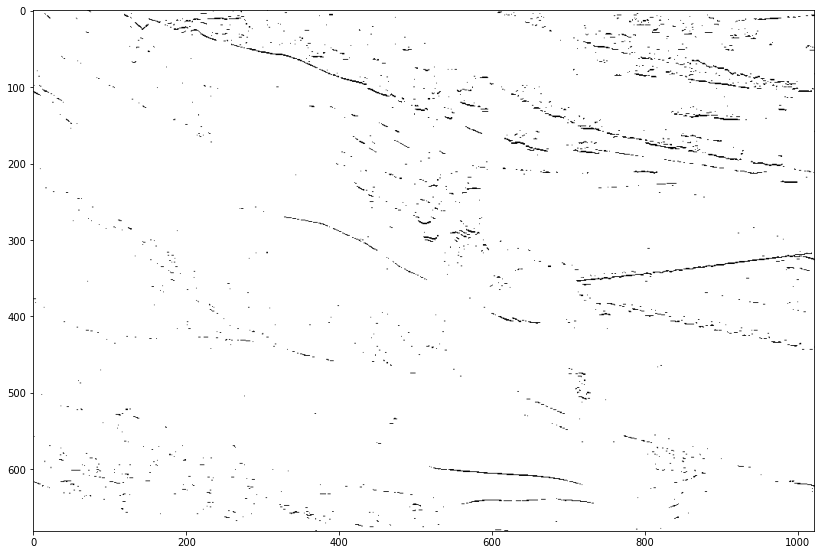

In [ ]:
plt.figure(figsize=(14,14))
plt.imshow(img2>0.3, cmap='gray')

(array([3.98000e+02, 1.66400e+03, 5.68600e+03, 2.68600e+04, 2.87591e+05,
        3.40314e+05, 2.83530e+04, 4.45500e+03, 6.00000e+02, 6.10000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

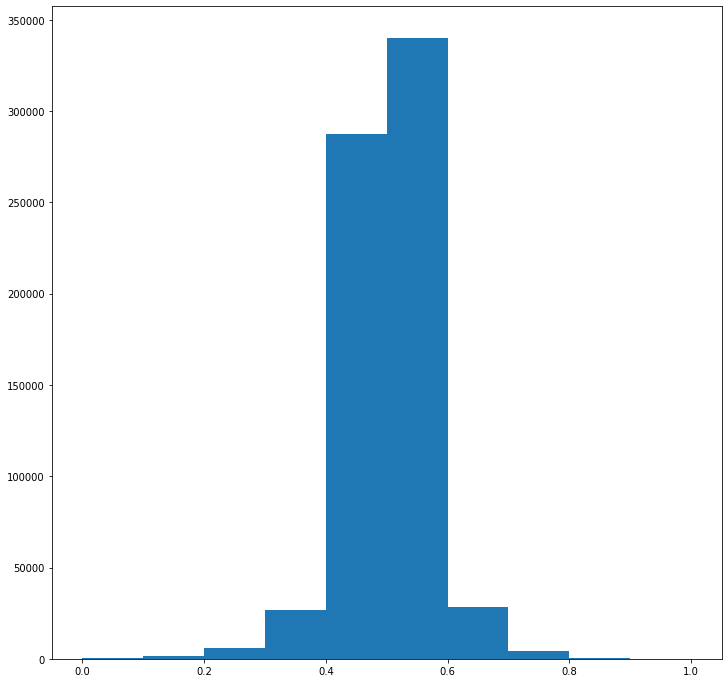

In [ ]:
plt.figure(figsize=(12,12))
plt.hist(img2.ravel())

In [ ]:
aa = np.array([3,4,5,6,7,8])
(aa - aa.min())/(aa.max() - aa.min())

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])